# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: https://www.kaggle.com/datasets/harriken/employeeturnover

Import the necessary libraries and create your dataframe(s).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

In [3]:
#although the complete dataset has four tables, based on my business questions, I will only be using "churn" and "votes"
churn=pd.read_csv("C:/Users/emmag/Desktop/Women+/archive (16)/churn.csv")
votes=pd.read_csv("C:/Users/emmag/Desktop/Women+/archive (16)/votes.csv")

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [4]:
percent_missing = churn.isnull().sum() * 100 / len(churn)
percent_missing

employee                 0.0
companyAlias             0.0
numVotes                 0.0
lastParticipationDate    0.0
stillExists              0.0
dtype: float64

In [5]:
percent_missing2 = votes.isnull().sum() * 100 / len(votes)
percent_missing2

employee        0.0
companyAlias    0.0
voteDate        0.0
vote            0.0
dtype: float64

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

<Axes: >

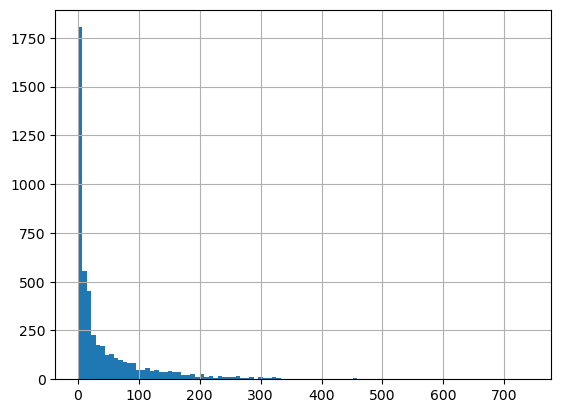

In [6]:
#looking for outliers in the number of votes
churn['numVotes'].hist(bins=100)

<Axes: >

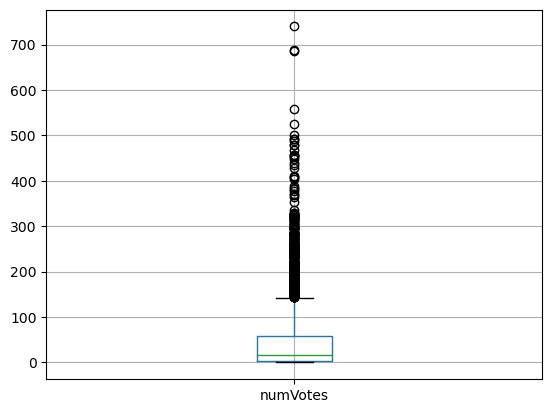

In [7]:
#closer inspection with box plot
churn.boxplot(column=['numVotes'])

In [8]:
#one more check with descriptive statistics - due to the presence of multiple outliers near the 700 range, I am assuming
#that they are true outliers and simply reflective of the variance of amounts that employees used the app
churn['numVotes'].describe()

count    4847.000000
mean       45.896431
std        71.302128
min         0.000000
25%         3.000000
50%        16.000000
75%        59.000000
max       740.000000
Name: numVotes, dtype: float64

In [9]:
#checking format of the datetime column
#this technically would fall under the inconsistent data section, but it is a required first step to get a readable outlier
#graph for this column
churn['lastParticipationDate'].head()

0    Thu Feb 23 12:48:04 CET 2017
1    Wed Jan 18 14:00:55 CET 2017
2    Fri Mar 17 01:00:00 CET 2017
3    Sat Nov 19 15:02:14 CET 2016
4    Thu Feb 16 01:00:00 CET 2017
Name: lastParticipationDate, dtype: object

In [10]:
#converting to datetime data type
churn['lastParticipationDate'] = pd.to_datetime(churn['lastParticipationDate'])

C:\Users\emmag\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\emmag\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname CEST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [11]:
#checking to make sure it worked
churn['lastParticipationDate'].head()

0   2017-02-23 12:48:04
1   2017-01-18 14:00:55
2   2017-03-17 01:00:00
3   2016-11-19 15:02:14
4   2017-02-16 01:00:00
Name: lastParticipationDate, dtype: datetime64[ns]

In [12]:
#parsing out the month and year from the full datetime
churn['lastParticipationMonthYear']=churn['lastParticipationDate'].dt.strftime('%m/%Y')

In [13]:
#checking to make sure it worked
churn.head()

,employee,companyAlias,numVotes,lastParticipationDate,stillExists,lastParticipationMonthYear
0,512,56aec740f1ef260003e307d6,4,2017-02-23 12:48:04,True,02/2017
1,-2,56aec740f1ef260003e307d6,0,2017-01-18 14:00:55,False,01/2017
2,2,56aec740f1ef260003e307d6,72,2017-03-17 01:00:00,True,03/2017
3,487,56aec740f1ef260003e307d6,14,2016-11-19 15:02:14,False,11/2016
4,3,56aec740f1ef260003e307d6,22,2017-02-16 01:00:00,True,02/2017


In [14]:
#converting new column to datetime for proper ordering on the graph
churn['lastParticipationMonthYear'] = pd.to_datetime(churn['lastParticipationMonthYear'])

array([[<Axes: title={'center': 'lastParticipationMonthYear'}>]],
      dtype=object)

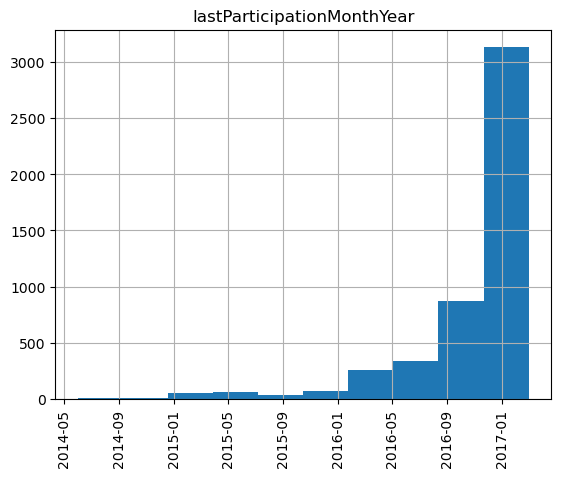

In [15]:
# finally plotting using a histogram to reflect the x axis as dates
churn.hist("lastParticipationMonthYear", xrot=90)

In [16]:
#looking at value counts to compare graph
churn['lastParticipationMonthYear'].value_counts()

2017-03-01    2109
2017-02-01     456
2016-11-01     333
2017-01-01     316
2016-10-01     303
2016-12-01     249
2016-09-01     237
2016-06-01     165
2016-07-01      97
2016-08-01      81
2016-05-01      76
2016-02-01      67
2016-04-01      58
2016-03-01      56
2015-03-01      50
2016-01-01      31
2015-06-01      25
2015-12-01      20
2015-07-01      19
2015-11-01      18
2015-10-01      16
2015-09-01      12
2015-05-01      12
2015-04-01      10
2015-08-01       9
2014-06-01       7
2014-11-01       6
2015-02-01       6
2014-12-01       3
Name: lastParticipationMonthYear, dtype: int64

In [17]:
#repeating the same process for the votedate column from votes
votes['voteDate'] = pd.to_datetime(votes['voteDate'])

C:\Users\emmag\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\emmag\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname CEST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [18]:
votes['voteMonthYear']=votes['voteDate'].dt.strftime('%m/%Y')

In [19]:
votes['voteMonthYear'] = pd.to_datetime(votes['voteMonthYear'])

array([[<Axes: title={'center': 'voteMonthYear'}>]], dtype=object)

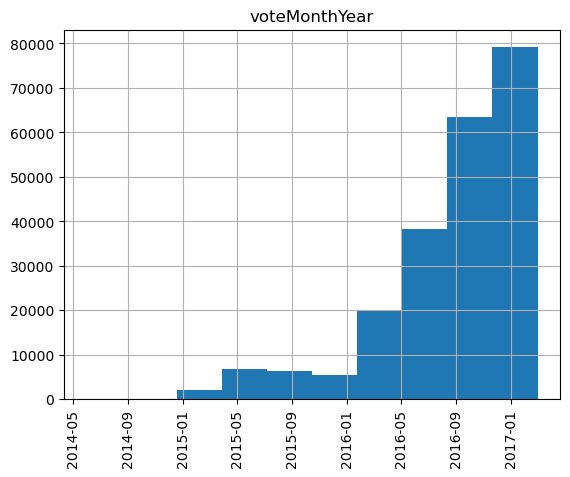

In [20]:
votes.hist("voteMonthYear", xrot=90)

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [21]:
#check for duplicates in overall churn dataframe
duplicateRowsChurn = churn[churn.duplicated()]
duplicateRowsChurn

,employee,companyAlias,numVotes,lastParticipationDate,stillExists,lastParticipationMonthYear


In [22]:
#adjusting the output options to show all matching rows
pd.set_option('display.max_rows', 350)

In [23]:
#checking for duplicates without using employee ID. what are the chances that a company has two employees who votes the exact
#same number of times, last voted on the same date and time, and matches stillExists? Coincidence or duplicate?
duplicateRowsChurn2 = churn[churn.duplicated(['companyAlias', 'numVotes', 'lastParticipationDate', 'stillExists'])]
duplicateRowsChurn2
#to make an educated guess, I looked at the time stamp more closely and noticed two things: first, many of the duplicates
#occurred at exactly the same time (seconds and all) but were exactly on the hour - either 1 o'clock CET or 2 o'clock CEST -
#my hypothesis is that the poll was released daily at that time and many employees complete it right away, which would 
#naturally explain the duplication. However, I also noticed the prevalance of negative employee numbers and how each employee
#with a negative employee id was also listed as voting 0 times, and often ahd multiple duplicates. The explanation from
#Kaggle is weak at best, but my best guess is that these are errors and I will delete them

,employee,companyAlias,numVotes,lastParticipationDate,stillExists,lastParticipationMonthYear
162,188,56aec740f1ef260003e307d6,18,2017-03-17 01:00:00,True,2017-03-01
281,351,56aec740f1ef260003e307d6,106,2017-03-20 01:00:00,True,2017-03-01
288,361,56aec740f1ef260003e307d6,2,2016-10-18 02:00:00,True,2016-10-01
307,412,56aec740f1ef260003e307d6,100,2017-03-20 01:00:00,True,2017-03-01
309,419,56aec740f1ef260003e307d6,1,2016-06-20 02:00:00,True,2016-06-01
333,460,56aec740f1ef260003e307d6,100,2017-03-20 01:00:00,True,2017-03-01
355,511,56aec740f1ef260003e307d6,20,2017-02-24 01:00:00,True,2017-02-01
390,12,5370af43e4b0cff95558c12a,1,2014-06-07 02:00:00,False,2014-06-01
392,13,5370af43e4b0cff95558c12a,1,2014-06-07 02:00:00,False,2014-06-01
394,14,5370af43e4b0cff95558c12a,1,2014-06-07 02:00:00,False,2014-06-01


In [25]:
#checking the shape before deletion
churn.shape

(4847, 6)

In [27]:
#deleting the negaive employee numbers
churn = churn.drop(churn.index[churn['employee'] < 0])

In [29]:
#checking shape after deletion
churn.shape

(4418, 6)

In [30]:
#looking for duplicates in overall votes dataframe - the same employee from the same company voting twice at exactly the 
#same time feels like a mistake, so I'll eliminate them
duplicateRowsVotes = votes[votes.duplicated()]
duplicateRowsVotes

,employee,companyAlias,voteDate,vote,voteMonthYear
91254,1,54e52607e4b01191dc064966,2016-09-20 02:00:00,3,2016-09-01
92891,51,54e52607e4b01191dc064966,2016-10-11 02:00:00,2,2016-10-01
93094,85,54e52607e4b01191dc064966,2016-10-13 02:00:00,3,2016-10-01
93926,56,54e52607e4b01191dc064966,2016-10-24 02:00:00,3,2016-10-01
93930,86,54e52607e4b01191dc064966,2016-10-24 02:00:00,3,2016-10-01
94352,51,54e52607e4b01191dc064966,2016-10-28 02:00:00,3,2016-10-01
94473,51,54e52607e4b01191dc064966,2016-10-30 02:00:00,3,2016-10-01
94710,85,54e52607e4b01191dc064966,2016-11-02 01:00:00,3,2016-11-01
95364,85,54e52607e4b01191dc064966,2016-11-10 01:00:00,3,2016-11-01
95623,57,54e52607e4b01191dc064966,2016-11-14 01:00:00,3,2016-11-01


In [31]:
#checking the start of votes before duplicate removal
votes.shape

(221232, 5)

In [32]:
#removing duplicates
votes.drop_duplicates(inplace=True)

In [33]:
#checking shape after removal - duplicates successfully removed
votes.shape

(221145, 5)

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [34]:
#checking if any Boolean values were misspelled which would throw off totals and percentages
churn['stillExists'].value_counts()

True     3673
False     745
Name: stillExists, dtype: int64

In [35]:
#already fixed timedate formatting above

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset? I only found duplicate data in my dataset, although the strange timedate format that I changed could be considered inconsistent data
2. Did the process of cleaning your data give you new insights into your dataset? Cleaning the data really hit home how large my dataset is, which makes me a little nervous for analysis
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations? The biggest hiccup I ran into was duplicates - unfortunately, some of the duplicates came down to a judgement call and I am very much aware that that judgement call could drastically change the way the analysis comes out